# Data Analysis and visualization for tracking developer productivity

Chipy's mentorship program is an extra-ordinary jounery for becoming a better developer. As a mentee, you are expected to do a lot - you read new articles/books, write code, debug and troubleshoot, pair program with other mentees in coding workshop or your mentor. This is involves managing time efficiently and doing the effective things. But as the old adage goes, "you can't manage what you can't measure".

This project is the third of the three part series of building tools for the mentees for tracking time. The end goal of such a tool will be to aggregate anonymous data and analyze how does a typical mentee spend on blogging (b), coding (c), debugging (d), pair program (p) with mentor or other mentees.

In this project we will be using `pandas` to analyze the data gathered by using the command line tool we built in the first part of the series. We will also be using `altair`, a visualization library to do some exploratory analysis of the data.

Short url for this page: http://bit.ly/data_trackcoder

##  Is this project for you

Before you progress further, let's check if we are ready to solve this. You should

- Have a personal computer with working wifi and power cord
- Have Python 3 installed on your computer. *Yes, **Python 3** only* 😎
- Have some idea about lists, dictionaries and functions
- Have created a virtual environment and installing packages with `pip`

In addition, you should be familiar with [Part 1](https://github.com/chicagopython/CodingWorkshops/tree/master/problems/py101/trackcoder), and [Part 2](https://bit.ly/flask_trackcoder) of this three part exercise.

## Getting the project setup in your computer
If you are familiar with git, run


```
git clone https://github.com/chicagopython/CodingWorkshops.git
```

If not, go to https://github.com/chicagopython/CodingWorkshops

Click on the Download Zip and unzip the file that gets downloaded.

From your command line (terminal in mac osx, or linux and command prompt in windows), change directory to the path where you have downloaded it.


    On linux or OS X

      > cd path/to/CodingWorkshops/problems/data_science/

    On Windows

      > cd path\to\CodingWorkshops\problems\data_science

### Check if you have the latest notebook

If you have downloaded the notebook before the event of the Project Night, you have downloaded the notebook with only materials to review for project night without the actual problems. The actual problems will be released 2 hours before the event. Please update your notebook in order to get the challenge questions.

In that directory, run the following command

    git pull


### Installation of Required packages

The following packages are needed for this project.

```
numpy==1.14.2
pandas==0.22.0
python-dateutil==2.7.2
pytz==2018.4
scikit-learn==0.19.1
scipy==1.0.1
six==1.11.0
sklearn==0.20.0
altair==2.2.2 
```
These packages are listed in the file `requirements.txt` in this directory.
From a terminal (in mac ox or linux) or command prompt (windows), install them using the following command.

```
pip install -r requirements.txt
```

Once the installation completed, start Jupyter notebook by issuing the command.
    
    > jupyter notebook

Running the following command here will open up a browser (http://localhost:8888)  and display all the notebooks under this directory.
Double click to open the `trackcoder` notebook.

Next execute the cell below by hitting `Shift + Enter`.

In [3]:
import pandas

If the above line executes without any error, then congratulations 🎉 - you have successfully installed everything, and ready to get started.

## Getting Started with Pandas

### Loading pandas

We will start off with an gentle introduction to `pandas` that is mostly taken from the [wonderful 10 minutes guide](https://pandas.pydata.org/pandas-docs/stable/10min.html). Lets start by importing the necessary packages.

In [1]:
import pandas as pd
import numpy as np

### Pandas Series and Dataframe

#### Series

A pandas `Series` is a one-dimensional labeled array capable of holding any data type. The axis labels are collectively referred to as the index. Lets create `series` from the different task types that we have defined in [Part 1](https://github.com/chicagopython/CodingWorkshops/tree/master/problems/py101/trackcoder#181-interactive-mode).

In [6]:
description = pd.Series(data=['blogging','coding','debugging','mentor','pair_programming', 'research'], 
                        index=['b', 'c', 'd','m','p','r'])
print(f"data: {description.values}\nindex: {description.index}")

data: ['blogging' 'coding' 'debugging' 'mentor' 'pair_programming' 'research']
index: Index(['b', 'c', 'd', 'm', 'p', 'r'], dtype='object')


In [7]:
description


b            blogging
c              coding
d           debugging
m              mentor
p    pair_programming
r            research
dtype: object

#### DataFrame

A pandas `DataFrame` is a 2-dimensional labeled data structure where the columns can be of different data types. 

Lets create another series with number of minutes and same indexes as that of `description`.

In [8]:
mins = pd.Series([100,100,200,50,50,300], ['b', 'c', 'd', 'm', 'p', 'r'])
mins

b    100
c    100
d    200
m     50
p     50
r    300
dtype: int64

Now lets create a dataframe using `description` and `mins`.

In [9]:
d = {'description': description, 'mins': mins}

frame = pd.DataFrame(d)
frame

,description,mins
b,blogging,100
c,coding,100
d,debugging,200
m,mentor,50
p,pair_programming,50
r,research,300


### Loading the data

Next we will load the data present in the sqlite database in the folder `CodingWorkshops/problems/py101/trackcoder/`. If you choose to use a different dataset, all you need to do is change the value of `db` to the path of your file.

In [2]:
db="../py101/trackcoder/task_track.db"
db

'../py101/trackcoder/task_track.db'

In [3]:
import sqlite3
conn = sqlite3.connect(db)
df = pd.read_sql_query("select * from todo", conn)

### Viewing the data

In [4]:
df


,id,task,description,timestamp,mins,done
0,1,m,initial kickoff event meeting,2018-11-15 10:40:53.958010,60,1
1,2,r,meet cohort,2018-11-15 10:41:38.542572,120,1
2,3,r,web search exploring possible ideas,2018-11-15 10:42:43.763348,150,1
3,4,m,explore project ideas,2018-11-15 10:43:12.314595,120,1
4,5,m,basic python and pandas,2018-11-15 10:45:50.358397,120,1
5,6,p,first project night py101,2018-11-15 10:46:28.335922,180,1
6,7,b,first blog post,2018-11-15 10:46:58.588987,120,1
7,8,m,"refine project ideas, continue pandas",2018-11-15 10:48:04.462996,120,1
8,9,m,"hangout identify resources, pandas",2018-11-15 10:48:53.416604,60,1
9,10,m,review of python skills learned on first proje...,2018-11-15 10:49:51.213113,120,1


In [5]:
df.head() #first 5 rows

,id,task,description,timestamp,mins,done
0,1,m,initial kickoff event meeting,2018-11-15 10:40:53.958010,60,1
1,2,r,meet cohort,2018-11-15 10:41:38.542572,120,1
2,3,r,web search exploring possible ideas,2018-11-15 10:42:43.763348,150,1
3,4,m,explore project ideas,2018-11-15 10:43:12.314595,120,1
4,5,m,basic python and pandas,2018-11-15 10:45:50.358397,120,1


In [6]:
df.tail() # last 5 rows

,id,task,description,timestamp,mins,done
20,21,r,"explore graphing plugins, Dash, MatPlot, Seaborn",2018-11-15 11:00:13.131261,180,1
21,22,m,reviewing graphing options and ways to aggrega...,2018-11-15 11:01:48.783390,120,1
22,23,c,aggregating and filtering data,2018-11-15 11:02:47.564190,150,1
23,24,d,double checking results and debugging,2018-11-15 11:03:37.982159,150,1
24,25,p,third project night,2018-11-15 11:04:19.112410,180,1


### Fix data type

Pandas has the following data types.

```
object
int64
float64
bool
datetime64
timedelta[ns]
category
```

Notice that when we imported the data from our sqlite database, all the columns got imported as objects. Lets fix this by editing the data type of the column inplace, i.e. modify the data frame so that beyond this point this change will persist for the dataframe.

In [7]:
df['timestamp'] = df['timestamp'].astype('datetime64[ns]')
df['done'] = df['done'].astype('bool')
df.head()

,id,task,description,timestamp,mins,done
0,1,m,initial kickoff event meeting,2018-11-15 10:40:53.958010,60,True
1,2,r,meet cohort,2018-11-15 10:41:38.542572,120,True
2,3,r,web search exploring possible ideas,2018-11-15 10:42:43.763348,150,True
3,4,m,explore project ideas,2018-11-15 10:43:12.314595,120,True
4,5,m,basic python and pandas,2018-11-15 10:45:50.358397,120,True


### Index, columns and summary

In [8]:
df.index

RangeIndex(start=0, stop=25, step=1)

Columns

In [9]:
df.columns

Index(['id', 'task', 'description', 'timestamp', 'mins', 'done'], dtype='object')


Quickly summarize the descriptive statistics

In [10]:
df.describe()

,id,mins
count,25.000000,25.000000
mean,13.000000,123.600000
std,7.359801,39.987498
min,1.000000,60.000000
25%,7.000000,120.000000
50%,13.000000,120.000000
75%,19.000000,150.000000
max,25.000000,180.000000


### Selecting data

Lets say we need to find the first three tasks, and get the values for timestamp and description of the task. Pandas provides a few ways to access the data from the dataframe - by label based indexes, numerical indexes or a hybrid approach.

Try them out by yourself, by running the code below.

```python
df[0:2] # gives you first three rows, all columns
df[0:2][['timestamp', 'description']] # returns a copy with only 'timestamp' and 'description'

df.iloc[0:2] # purely integer based indexing, similar to indexing in python. first three rows, all columns
df.iloc[0:2][['timestamp', 'description']]
df.iloc[[0,1,2],[2,3]]
```

In [11]:
df.iloc[[0,1,2],[2,3]]

,description,timestamp
0,initial kickoff event meeting,2018-11-15 10:40:53.958010
1,meet cohort,2018-11-15 10:41:38.542572
2,web search exploring possible ideas,2018-11-15 10:42:43.763348


To better understand how indexes work and show how the last two are different, lets make a copy of our dataframe.

In [12]:
_df = df.copy()

Lets set the index to be task instead of index pandas automatically provided us with.

In [13]:
_df.set_index('task', inplace=True)

Take a look at how the `_df` is different from `df`.

In [14]:
_df.head(), df.head()

(      id                          description                  timestamp  \
 task                                                                       
 m      1        initial kickoff event meeting 2018-11-15 10:40:53.958010   
 r      2                          meet cohort 2018-11-15 10:41:38.542572   
 r      3  web search exploring possible ideas 2018-11-15 10:42:43.763348   
 m      4                explore project ideas 2018-11-15 10:43:12.314595   
 m      5              basic python and pandas 2018-11-15 10:45:50.358397   
 
       mins  done  
 task              
 m       60  True  
 r      120  True  
 r      150  True  
 m      120  True  
 m      120  True  ,
    id task                          description                  timestamp  \
 0   1    m        initial kickoff event meeting 2018-11-15 10:40:53.958010   
 1   2    r                          meet cohort 2018-11-15 10:41:38.542572   
 2   3    r  web search exploring possible ideas 2018-11-15 10:42:43.763348   
 3

Now execute the following cells to find how different indexes can be used for selecting data.

```python
_df.loc['b'] # all rows matching task type b
_df.loc[_df['mins']==30, ['description','timestamp']] # returns only a dataframe where the mins equals 30
_df.loc[_df['mins']==30, 'description'] # returns a series where the mins equals 30
```

In [16]:
_df.loc[_df['mins']==120, ['description', 'mins'] ]# returns a series where the mins equals 30

,description,mins
task,,
r,meet cohort,120
m,explore project ideas,120
m,basic python and pandas,120
b,first blog post,120
m,"refine project ideas, continue pandas",120
m,review of python skills learned on first proje...,120
m,exploring dataset,120
m,"review progress, filtering and aggregating",120
m,explore parsing datafiles to fit in memory,120


Finally, check how having different indexes change the way you access the data.

In [17]:
df.loc[0:2] # Purely label-location based indexer for selection by label. This works as index is an integer.
#_df.loc[0:2] # Does not work

,id,task,description,timestamp,mins,done
0,1,m,initial kickoff event meeting,2018-11-15 10:40:53.958010,60,True
1,2,r,meet cohort,2018-11-15 10:41:38.542572,120,True
2,3,r,web search exploring possible ideas,2018-11-15 10:42:43.763348,150,True


To understand more about how indexes work read through [Zax's tutorial on Pandas MultiIndex](http://www.zaxrosenberg.com/pandas-multiindex-tutorial/)

### Aggregation
Now that we have some idea about the basics, lets get into the actual analysis. Lets start by getting the total count of each type of task that we have in our dataset.

In [18]:
df.groupby(['task']).count()

,id,description,timestamp,mins,done
task,,,,,
b,2,2,2,2,2
c,2,2,2,2,2
d,2,2,2,2,2
m,13,13,13,13,13
p,3,3,3,3,3
r,3,3,3,3,3


## Hashtag analysis

Hashtags are simple and easy way to put contextual information and in our data we find them in task descriptions. A task description might have no hashtag at all, a single hashtag or multiple hashtags. To start we need to parse the hashtags out from the description using regular expression. The following shows how multiple hastags are parsed out from a singe description.

```python
description = pd.Series(['#altair #pandas at project night'])
description.str.findall(r'#.*?(?=\s|$)').tolist()
```


In [19]:
description = pd.Series(['#altair #pandas at project night'])

In [20]:
mylist = description.str.findall(r'#.*?(?=\s|$)').tolist()
flattened_list = [val for sub_list in mylist for val in sub_list]
flattened_list

['#altair', '#pandas']

Note the result returned by running the above snippet is a list of lists. You probably want to flatten the list.

## Plotting wih Altair

Visualization is a powerful technique to find patterns in a dataset. It is also useful for communicate the findings of an analysis of a dataset. In the next section we will answer some simple questions about our dataset using visualization. While `matplotlib` is one of the most successful packages for the purpose, we will be using [`Altair`](https://altair-viz.github.io/) that provides a simple yet powerful declarative way of building charts.

Think of it as SQL, but for charts.

In [21]:
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

We need to enable the renderer based on which environment we are using - `notebook` for jupyter notebooks, `jupterlab` for jupyterlab etc.

### What are the frequencies of each task type?

Lets try to answer the same question we solved above, but this time using `altair`.

Below is a `bar diagram` of our data. Lets break down what is going on in the function. From the official documentation:

> The key to creating meaningful visualizations is to map properties of the data to visual properties in order to effectively communicate information. In Altair, this mapping of visual properties to data columns is referred to as
> an encoding, and is most often expressed through the Chart.encode() method.

Here are the 3 steps for building charts in altair

- pass your data to alt.Chart
```python
alt.Chart(df)
```
- select the type of chart you want to plot
```python    
alt.Chart(df).mark_bar()
```
- `encode` map the property of the data to visual properties
```python
alt.Chart(df).mark_bar().encode(
    y='task'      # map the y axis to df['task']
    x='count()'   # map the x axis to aggregate function of count defined in altair
    color='task') # map the color to df['task']
```

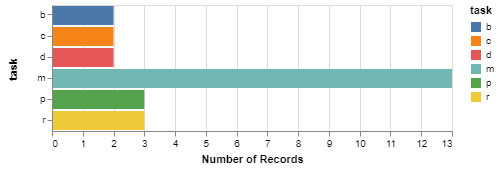

In [23]:
alt.Chart(df).mark_bar().encode(
    y='task',
    x='count()',
    color='task'
)

You can choose different chart types by changing `mark_bar` to `mark_point`, `mark_square`, `mark_geoshape` etc. as applicable for your data. Full list is [here](https://altair-viz.github.io/user_guide/marks.html)

## Feedback

Thanks for attending this project night. We put in a lot of effort to make this useful for you. However, we can not make it better, unless we hear back from you on what you want and collect data to make changes.

Please take a few moments to fill in the [small form](https://docs.google.com/forms/d/e/1FAIpQLSePDQlWOibJrF7rI5KrYhzUSNfXp9GMP-6b-bjC8_qSFgYp-w/viewform?usp=pp_url&entry.813953991=https://bit.ly/data_trackcoder) and help us improve it.